### DSC630
### Prediction Models

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%autosave 10

Autosaving every 10 seconds


Ordinal Logistic Regression Model

How likely is an athlete to finish in the top 10?

Based on age, height, weight, region, country, training camp, worldwide rank




In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans
from matplotlib import style
from scipy.cluster.hierarchy import dendrogram, linkage
style.use('ggplot')
from sklearn import preprocessing
import math

In [2]:
# import Semifinals dataset

df = pd.read_excel('/content/semifinals_full.xlsx')
df_copy=df.copy()

In [3]:
df.head()

,Name,Gender,Country,Age,Height_inches,Weight_lbs,Region,Training_Camp,Worldwide_Rank,Semifinals_Rank,...,workout_3_rank,workout_3_time,workout_4_rank,workout_4_lbs,workout_5_rank,workout_5_time,workout_6_rank,workout_6_time,workout_7_rank,workout_7_time
0,Alex Gazan,F,United States,21,66,150,North America West,Underdogs,13,1,...,18,12:36.86,11,165,23,03:35.34,3,11:10.37,14,04:25.50
1,Katrin Davidsdottir,F,United States,30,67,152,North America West,HWPO,11,2,...,20,13:39.55,5,190,8,03:19.62,15,12:08.36,21,04:34.64
2,Arielle Loewen,F,United States,29,63,150,North America West,NaN,7,3,...,10,12:58.40,5,190,22,03:33.35,13,11:53.90,25,04:39.04
3,Christine Kolenbrander,F,United States,31,66,154,North America West,HWPO,22,4,...,25,14:17.09,2,205,30,03:43.72,7,11:27.88,24,04:37.58
4,Bethany Flores,F,United States,29,64,144,North America West,NaN,115,5,...,27,14:35.86,9,175,24,03:37.14,17,12:13.06,11,04:21.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    79 non-null     object
 1   Gender                  79 non-null     object
 2   Country                 79 non-null     object
 3   Age                     79 non-null     int64 
 4   Height_inches           79 non-null     int64 
 5   Weight_lbs              79 non-null     int64 
 6   Region                  79 non-null     object
 7   Training_Camp           61 non-null     object
 8   Worldwide_Rank          79 non-null     int64 
 9   Semifinals_Rank         79 non-null     int64 
 10  Quarter_Rank_World_23   79 non-null     int64 
 11  Quarter_Rank_Region_23  79 non-null     int64 
 12  Open_Rank_World         79 non-null     int64 
 13  Open_Rank_Region        79 non-null     int64 
 14  Open_Rank_Country       79 non-null     int64 
 15  Semifina

In [ ]:
# initial or exploratory visualizations

df['Age'].value_counts()

27    9
25    8
28    8
29    7
30    7
31    6
32    5
24    5
21    4
33    4
23    4
34    3
22    2
26    2
18    1
20    1
19    1
17    1
39    1
Name: Age, dtype: int64

<Axes: xlabel='Semifinals_Rank', ylabel='count'>

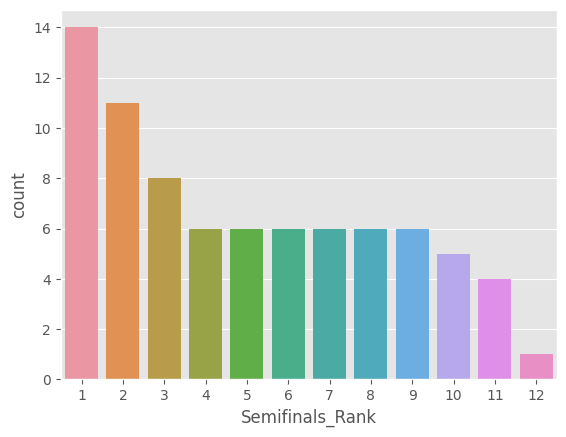

In [ ]:
sns.countplot(x ='Semifinals_Rank', data = df)

**According** to this, the "Semifinals Rank" is not evenally or normally distributed, and skewed to the left. This is to be expected though as a majority of the semifinal events have between 2-5 athletes who then continue to the final "Games" event in August.

In [5]:
predict_df = pd.read_excel('/content/games_predict.xlsx')

<Axes: xlabel='GAMES_PREDICT', ylabel='count'>

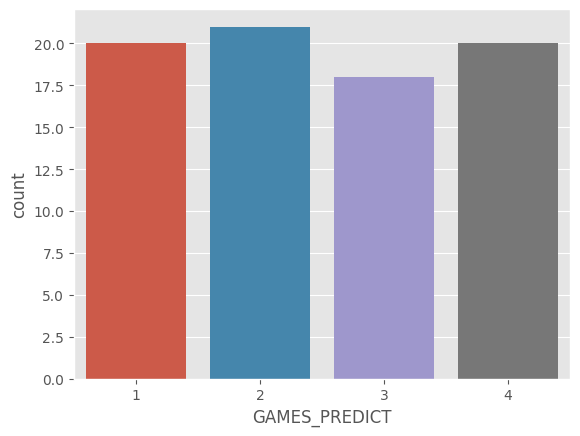

In [6]:
sns.countplot(x ='GAMES_PREDICT', data = predict_df)

This second dataset includes points and ranks from the recent "Games" event. I tried assigning the followings codes to each athlete based on their final "Games" rank. These values are almost equally distributed.

1.   High (likely to finish in the top 10)
2.   Somewhat (likely to finish in 11-20, or middle of ranks)
3.   Less (finish in 21-30, or lower third of ranks)
4.   Low (likely to finish in bottom 10, 31-40 ranks)

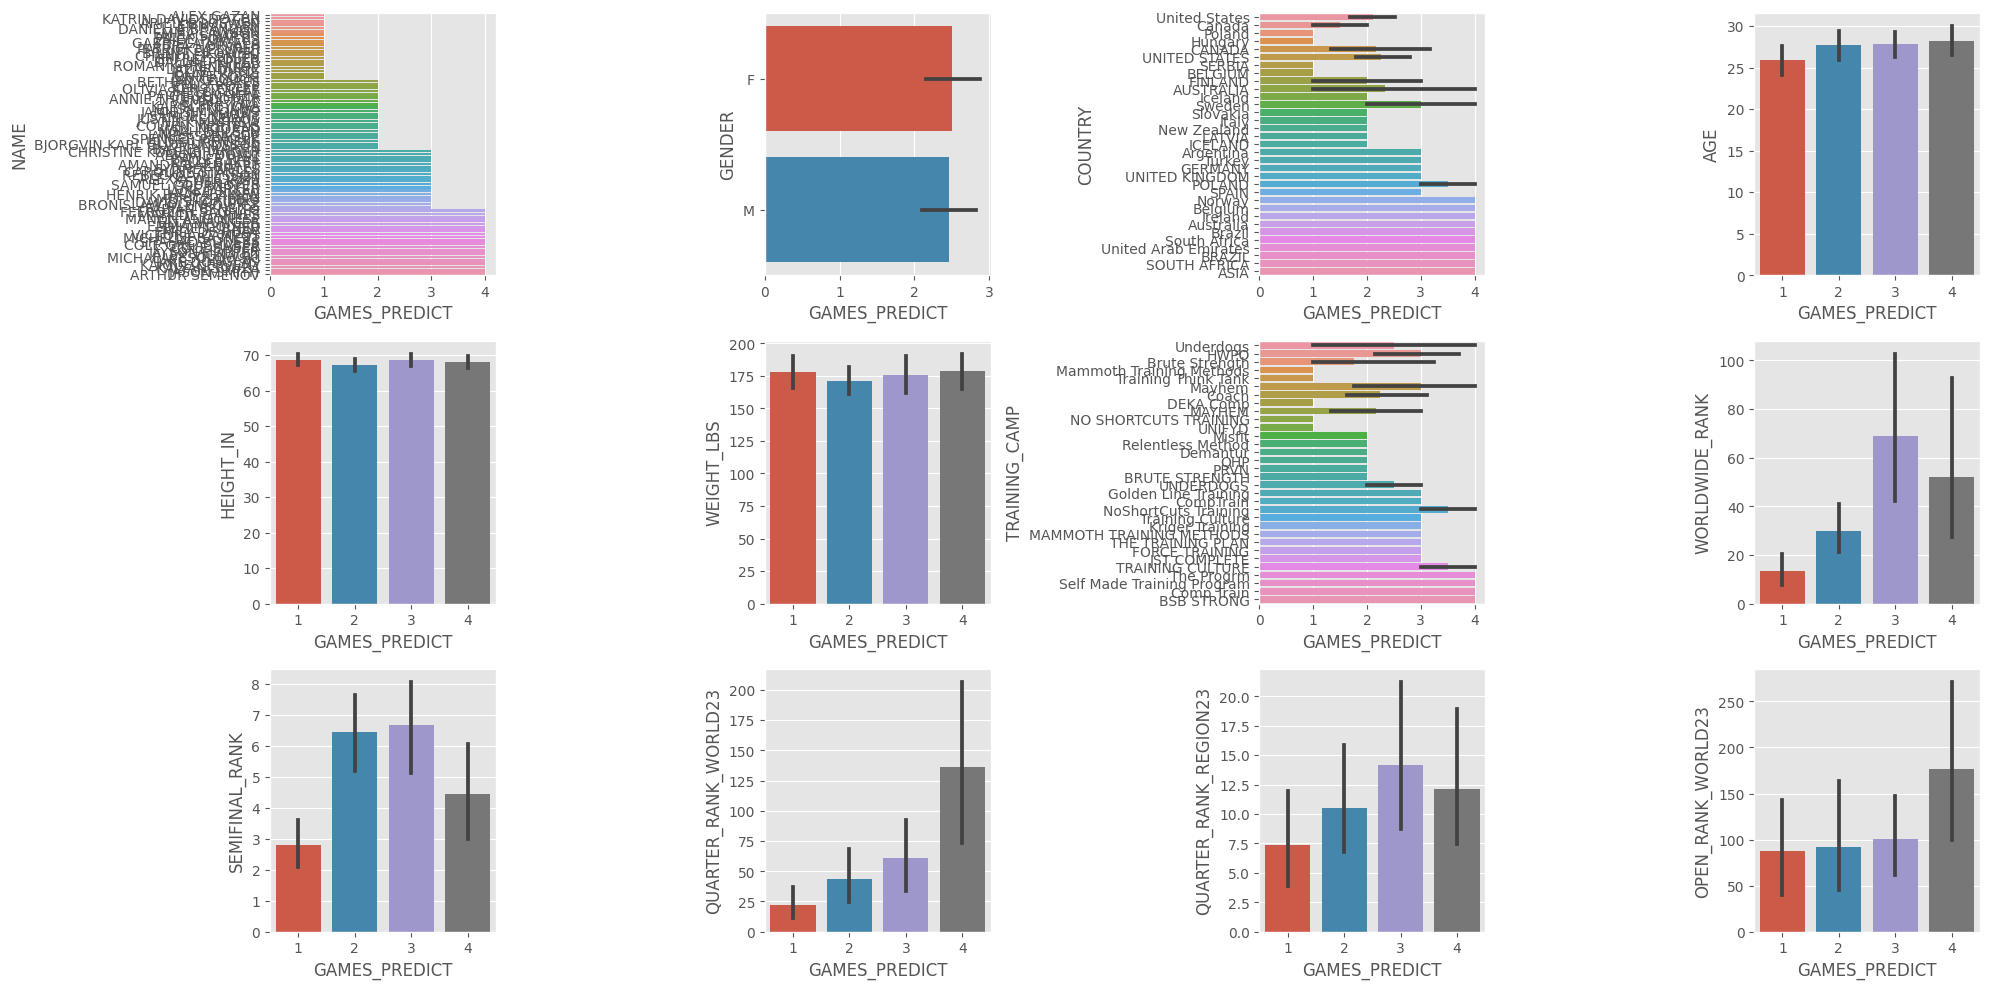

In [7]:
# looking at barplot data

fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for value, subplot in zip(range(0,18), ax.flatten()):
    sns.barplot(x=predict_df['GAMES_PREDICT'], y=predict_df[predict_df.columns[value]],ax=subplot)
fig.tight_layout()
plt.show()


*   Country - possibly, but this may just be the number of athletes alloted per country
*   Age - very slightly?
*   Training Camp
*   Quarterfinals and Open rank worldwide



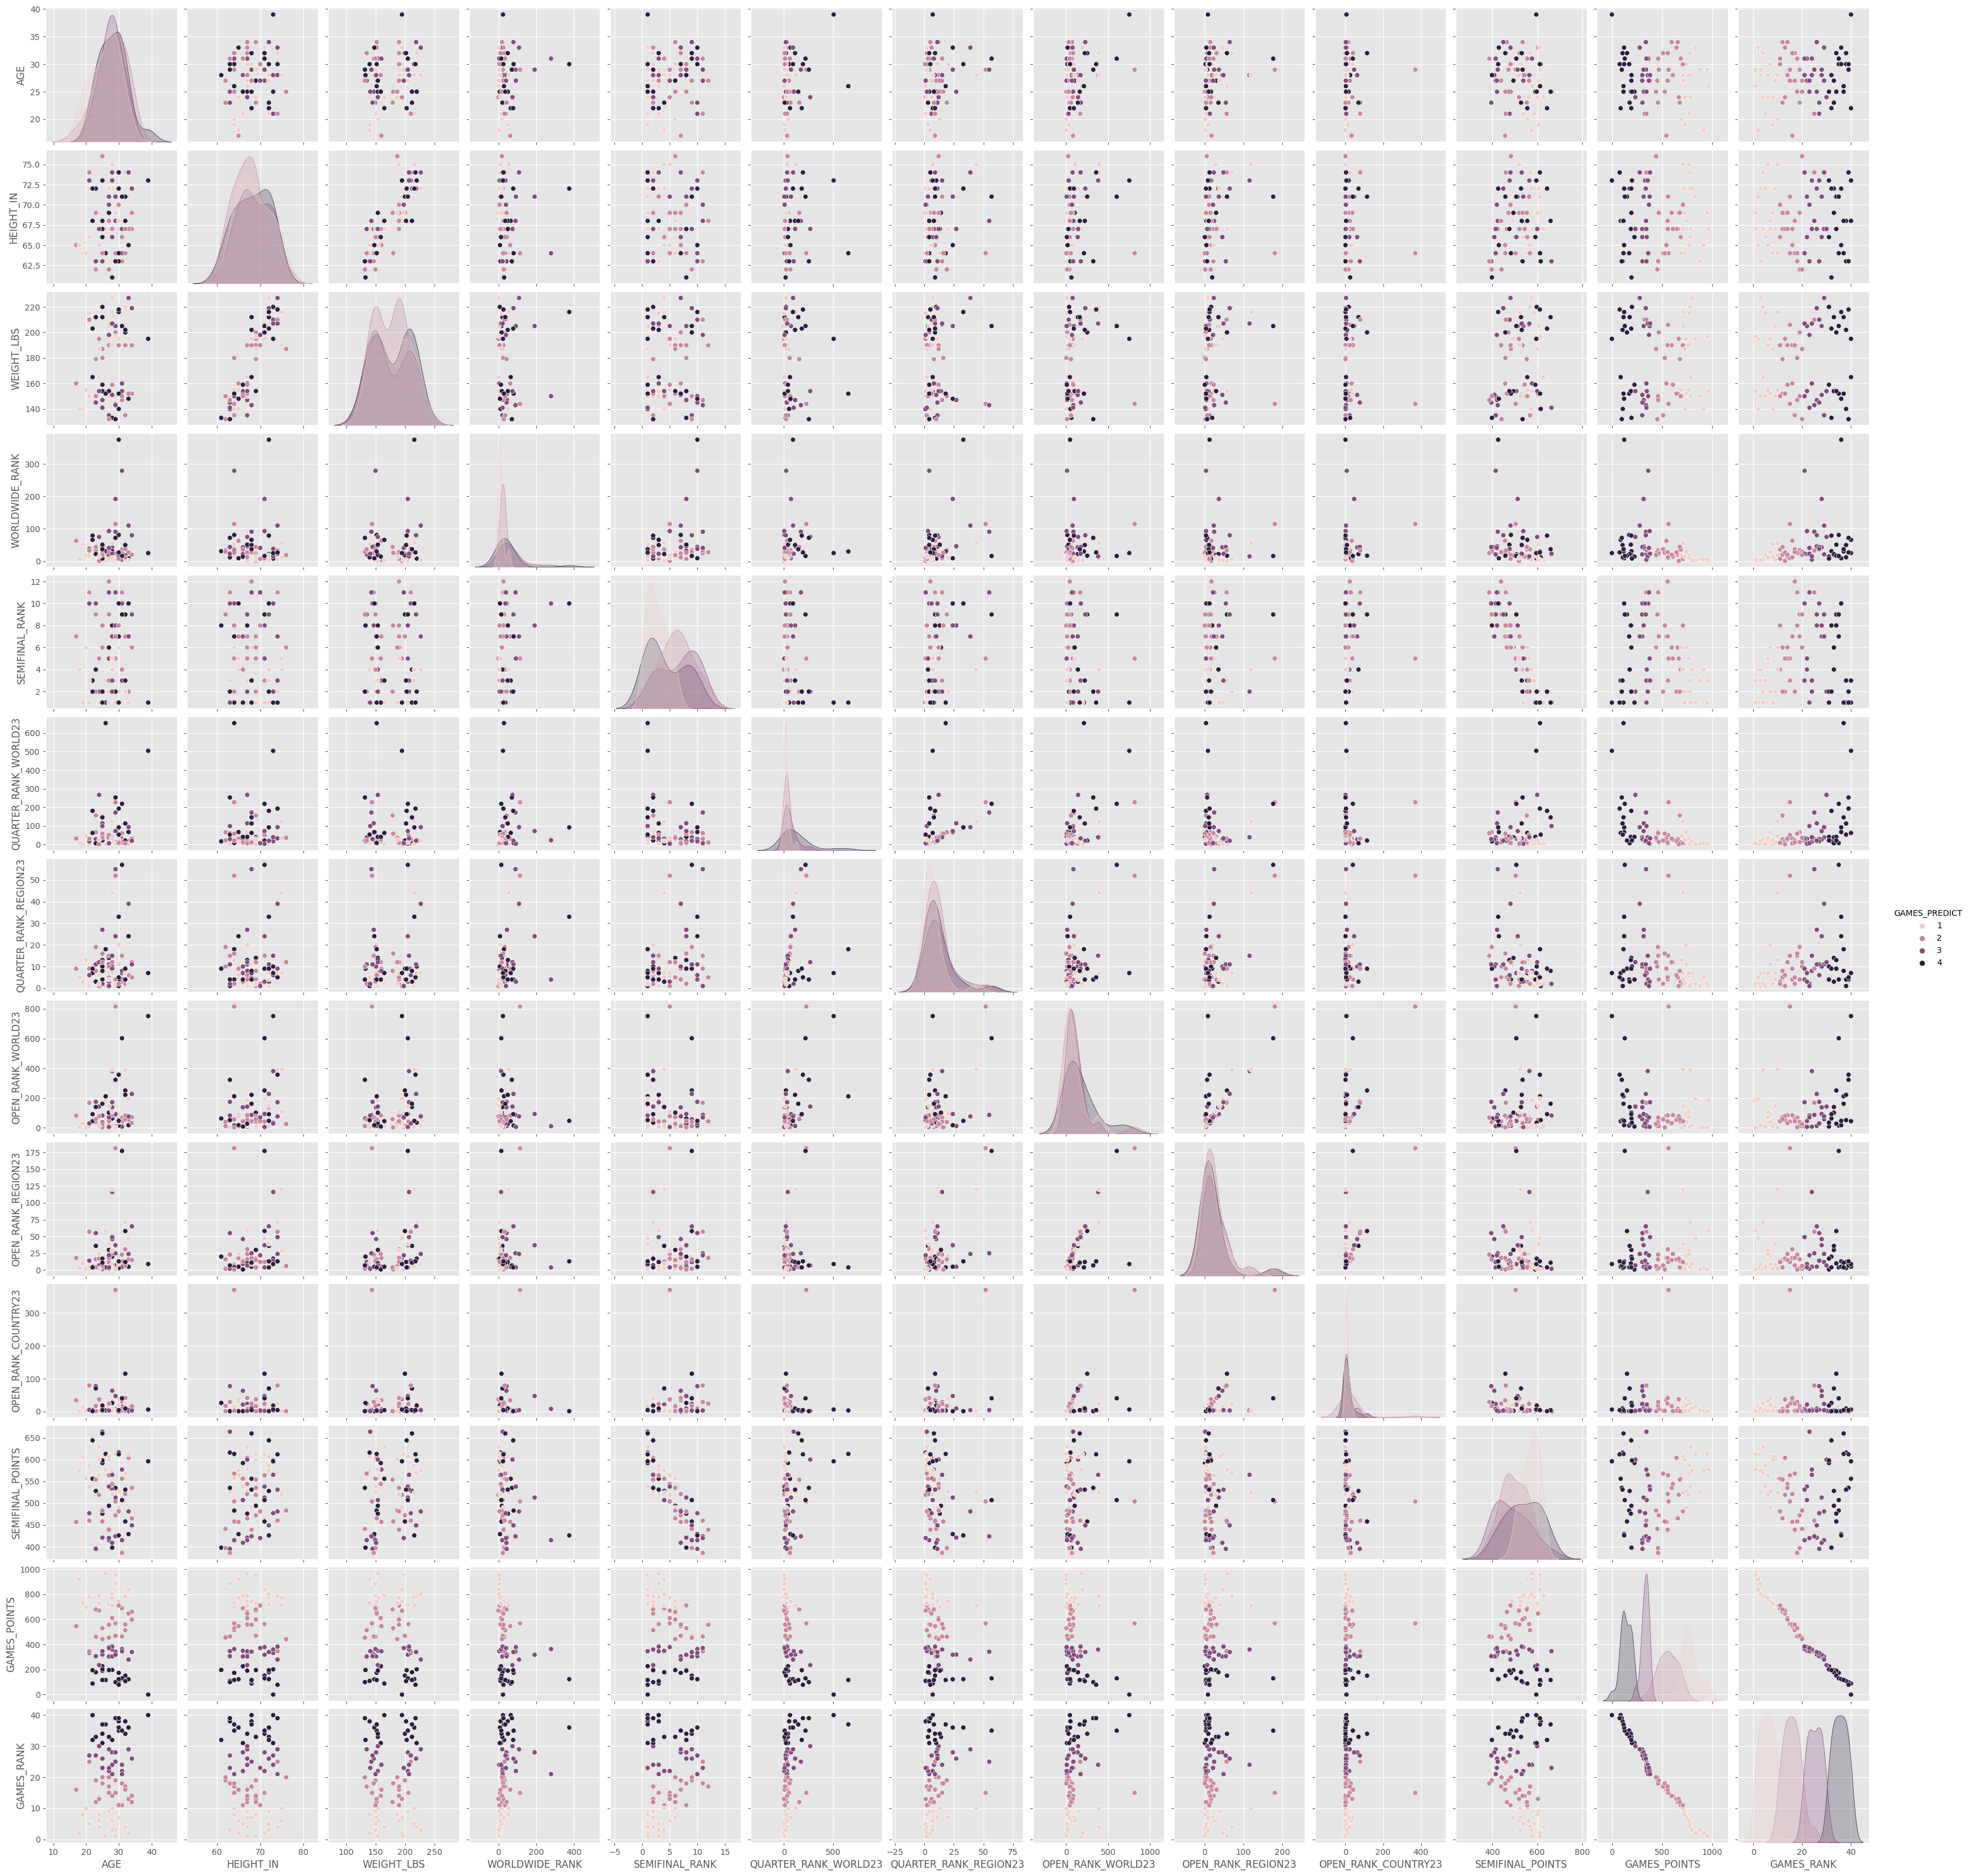

In [ ]:
sns.pairplot(predict_df,hue='GAMES_PREDICT')
plt.show()

In [ ]:
# looking for correlation / describe the dataset

predict_df.describe()

,AGE,HEIGHT_IN,WEIGHT_LBS,WORLDWIDE_RANK,SEMIFINAL_RANK,QUARTER_RANK_WORLD23,QUARTER_RANK_REGION23,OPEN_RANK_WORLD23,OPEN_RANK_REGION23,OPEN_RANK_COUNTRY23,SEMIFINAL_POINTS,GAMES_POINTS,GAMES_RANK,GAMES_PREDICT
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.00000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,27.405063,68.164557,175.772152,40.202532,5.063291,65.797468,10.962025,114.037975,24.00000,18.746835,523.506329,459.430380,20.379747,2.481013
std,4.195599,3.736275,29.220185,56.847159,3.317946,104.367003,12.011152,155.355130,34.21051,45.380293,71.402592,256.507994,11.640231,1.130699
min,17.000000,61.000000,132.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,386.000000,0.000000,1.000000,1.000000
25%,25.000000,65.000000,150.000000,12.000000,2.000000,13.000000,4.000000,24.500000,5.00000,2.000000,468.500000,230.500000,10.500000,1.500000
50%,28.000000,68.000000,165.000000,24.000000,5.000000,29.000000,7.000000,58.000000,12.00000,4.000000,528.000000,442.000000,20.000000,2.000000
75%,30.000000,71.000000,204.000000,44.000000,8.000000,66.500000,12.000000,141.500000,24.50000,20.500000,577.000000,703.000000,30.500000,3.500000
max,39.000000,76.000000,227.000000,375.000000,12.000000,653.000000,57.000000,815.000000,181.00000,370.000000,664.000000,966.000000,40.000000,4.000000


In [ ]:
df_corr = predict_df.corr()
df_corr

,AGE,HEIGHT_IN,WEIGHT_LBS,WORLDWIDE_RANK,SEMIFINAL_RANK,QUARTER_RANK_WORLD23,QUARTER_RANK_REGION23,OPEN_RANK_WORLD23,OPEN_RANK_REGION23,OPEN_RANK_COUNTRY23,SEMIFINAL_POINTS,GAMES_POINTS,GAMES_RANK,GAMES_PREDICT
AGE,1.000000,0.124913,0.121442,0.096138,0.060760,0.147519,0.155751,0.335827,0.173103,0.023642,-0.107982,-0.167788,0.154580,0.188114
HEIGHT_IN,0.124913,1.000000,0.860532,0.023382,-0.069107,-0.002642,0.113842,0.248669,0.261686,-0.089656,0.164085,-0.024368,0.012400,0.005301
WEIGHT_LBS,0.121442,0.860532,1.000000,0.072594,-0.024445,-0.035354,0.049508,0.200052,0.227672,-0.057281,0.161646,-0.036318,0.025776,0.025090
WORLDWIDE_RANK,0.096138,0.023382,0.072594,1.000000,0.327350,0.130549,0.337742,0.027169,0.032197,0.107669,-0.302766,-0.319775,0.308851,0.304033
SEMIFINAL_RANK,0.060760,-0.069107,-0.024445,0.327350,1.000000,-0.200591,0.350393,-0.124166,0.137683,0.158651,-0.898618,-0.216680,0.206507,0.169483
QUARTER_RANK_WORLD23,0.147519,-0.002642,-0.035354,0.130549,-0.200591,1.000000,0.356607,0.560985,0.105923,0.093031,0.196819,-0.443597,0.449637,0.392597
QUARTER_RANK_REGION23,0.155751,0.113842,0.049508,0.337742,0.350393,0.356607,1.000000,0.422234,0.585726,0.369142,-0.318208,-0.222902,0.214953,0.167507
OPEN_RANK_WORLD23,0.335827,0.248669,0.200052,0.027169,-0.124166,0.560985,0.422234,1.000000,0.752129,0.529511,0.096610,-0.243237,0.239122,0.203887
OPEN_RANK_REGION23,0.173103,0.261686,0.227672,0.032197,0.137683,0.105923,0.585726,0.752129,1.000000,0.607513,-0.119177,-0.011701,0.003638,0.000663
OPEN_RANK_COUNTRY23,0.023642,-0.089656,-0.057281,0.107669,0.158651,0.093031,0.369142,0.529511,0.607513,1.000000,-0.184730,-0.023994,0.013193,0.001154


The "Games Rank" and "Games Predict" are almost perfectly correlated, which is good! "Games Points" are negatively correlated at -0.992 with "Games Rank" and -0.95 with "Games Precict" which seems odd. The athlete with the most points wins, so it should be positively correlated to 100%? Or is it because the points numbers are bigger with higher ranked athletes? Similar to the "Semifinal Points" variable.

The "Open" ranks for both country and region show a weak correlation. "Open" worldwide rank shows a slightly stronger positive correlation, but still weaker than hoped for.

The "Quarterfinals" worldwide rank seems to be the highest positive correlation at 0.44 with "Games Rank" and 0.39 with "Games Predict" though these numbers still only indicate a moderate correlation.

The overall "Worldwide Rank" also seems to have a higher positive correlation with "Games Rank" at 0.30 and with "Games Predict" at 0.30.

Height and weight have a weak positive correlation. Age is slightly higher at 0.15 and 0.19.

<Axes: >

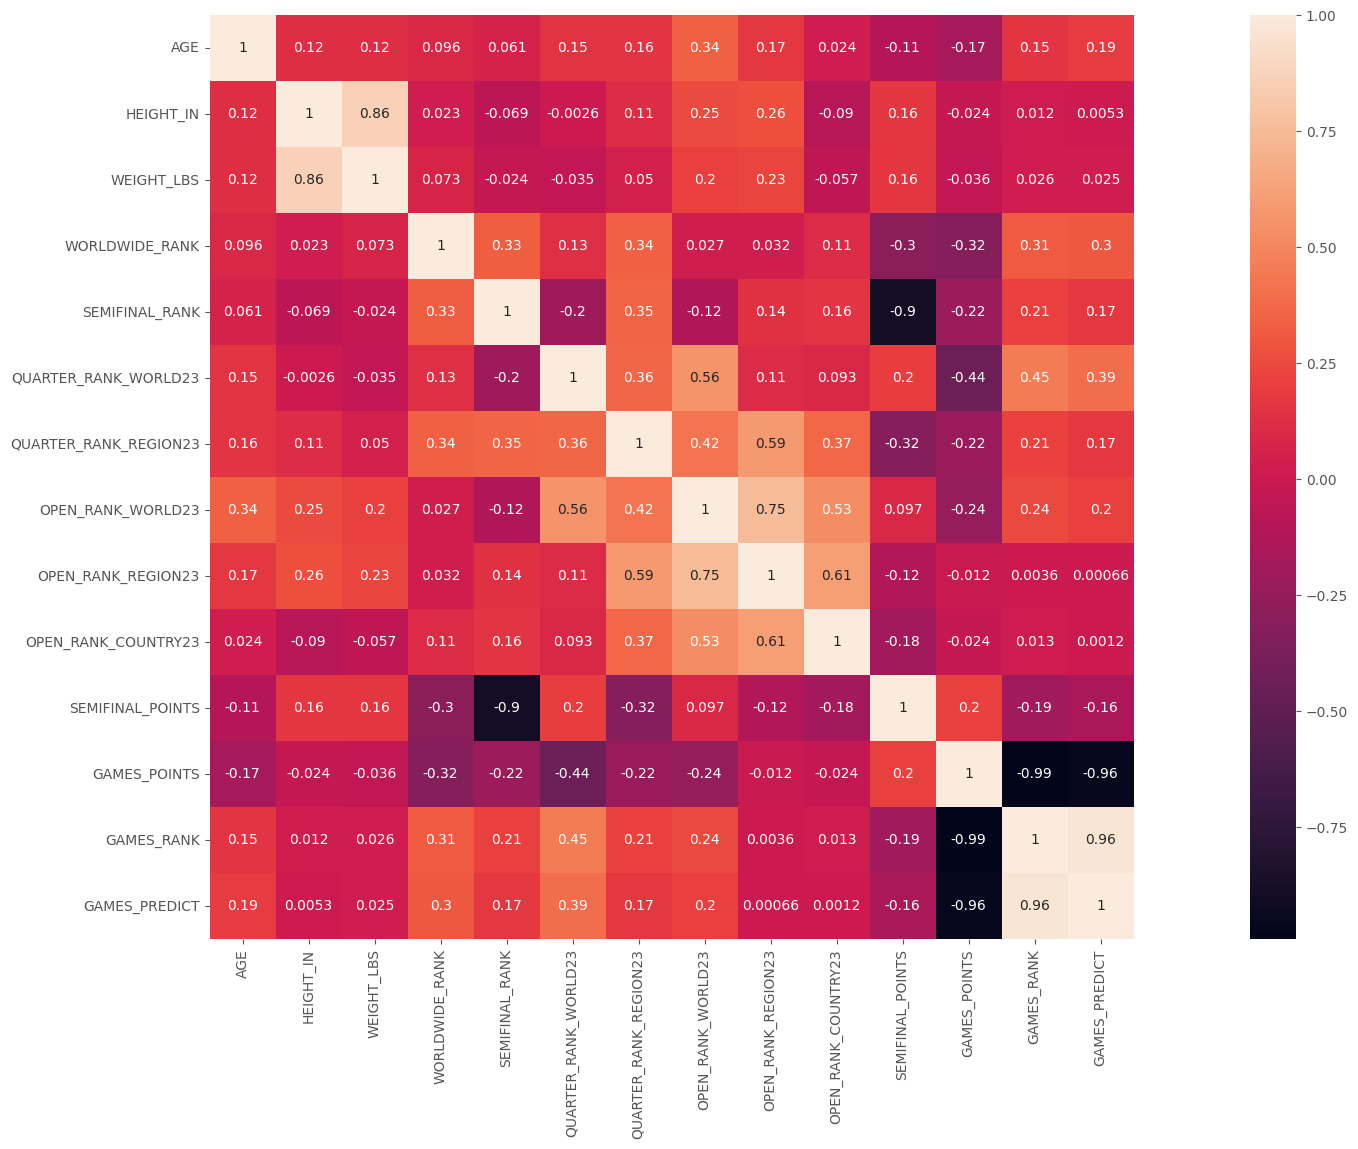

In [ ]:
# correlation heatmap - visually examine correlations above

mask=np.array(df_corr)
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(df_corr,annot=True,cbar=True,square=True)

In [ ]:
# looking at categorical variables

predict_df.head()

,NAME,GENDER,COUNTRY,AGE,HEIGHT_IN,WEIGHT_LBS,TRAINING_CAMP,WORLDWIDE_RANK,SEMIFINAL_RANK,QUARTER_RANK_WORLD23,QUARTER_RANK_REGION23,OPEN_RANK_WORLD23,OPEN_RANK_REGION23,OPEN_RANK_COUNTRY23,SEMIFINAL,SEMIFINAL_POINTS,GAMES_POINTS,GAMES_RANK,GAMES_PREDICT
0,ALEX GAZAN,F,United States,21,66,150,Underdogs,13,1,9,2,5,2,4,NAW,538,786,5,1
1,KATRIN DAVIDSDOTTIR,F,United States,30,67,152,HWPO,11,2,67,20,95,21,39,NAW,527,741,7,1
2,ARIELLE LOEWEN,F,United States,29,63,150,NaN,7,3,3,1,4,1,3,NAW,525,883,3,1
3,CHRISTINE KOLENBRANDER,F,United States,31,66,154,HWPO,22,4,31,7,46,9,21,NAW,507,349,22,3
4,BETHANY FLORES,F,United States,29,64,144,NaN,115,5,227,52,815,181,370,NAW,504,567,15,2


In [ ]:
col_list = predict_df.columns.values.tolist()
col_list

['NAME',
 'GENDER',
 'COUNTRY',
 'AGE',
 'HEIGHT_IN',
 'WEIGHT_LBS',
 'TRAINING_CAMP',
 'WORLDWIDE_RANK',
 'SEMIFINAL_RANK',
 'QUARTER_RANK_WORLD23',
 'QUARTER_RANK_REGION23',
 'OPEN_RANK_WORLD23',
 'OPEN_RANK_REGION23',
 'OPEN_RANK_COUNTRY23',
 'SEMIFINAL',
 'SEMIFINAL_POINTS',
 'GAMES_POINTS',
 'GAMES_RANK',
 'GAMES_PREDICT']

In [ ]:
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

In [ ]:
predict_df.dtypes

NAME                     object
GENDER                   object
COUNTRY                  object
AGE                       int64
HEIGHT_IN                 int64
WEIGHT_LBS                int64
TRAINING_CAMP            object
WORLDWIDE_RANK            int64
SEMIFINAL_RANK            int64
QUARTER_RANK_WORLD23      int64
QUARTER_RANK_REGION23     int64
OPEN_RANK_WORLD23         int64
OPEN_RANK_REGION23        int64
OPEN_RANK_COUNTRY23       int64
SEMIFINAL                object
SEMIFINAL_POINTS          int64
GAMES_POINTS              int64
GAMES_RANK                int64
GAMES_PREDICT             int64
dtype: object

In [8]:
# dataframe of categorical (object) variables

df_cat = pd.DataFrame(data = predict_df.dtypes, columns =
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var
# Output:['GENDER', 'COUNTRY', 'TRAINING_CAMP', 'SEMIFINAL', 'GAMES_PREDICT']
df_cat = predict_df[cat_var]
df_cat.head()

,NAME,GENDER,COUNTRY,TRAINING_CAMP,SEMIFINAL,GAMES_ORDINAL
0,ALEX GAZAN,F,United States,Underdogs,NAW,Highest
1,KATRIN DAVIDSDOTTIR,F,United States,HWPO,NAW,Highest
2,ARIELLE LOEWEN,F,United States,NaN,NAW,Highest
3,EMMA CARY,F,United States,Brute Strength,NAE,Highest
4,DANIELLE BRANDON,F,United States,Brute Strength,NAE,Highest


# Oridinal Logistic Regression

> Indented block



In [ ]:
# import libraries

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [9]:
# changing target variable to categorical ordered format

from pandas.api.types import CategoricalDtype

predict_cat = pd.read_excel('/content/games_predict2.xlsx')


In [10]:
predict_cat.dtypes

NAME                     object
GENDER                   object
COUNTRY                  object
AGE                       int64
HEIGHT_IN                 int64
WEIGHT_LBS                int64
TRAINING_CAMP            object
WORLDWIDE_RANK            int64
SEMIFINAL_RANK            int64
QUARTER_RANK_WORLD23      int64
QUARTER_RANK_REGION23     int64
OPEN_RANK_WORLD23         int64
OPEN_RANK_REGION23        int64
OPEN_RANK_COUNTRY23       int64
SEMIFINAL                object
SEMIFINAL_POINTS          int64
GAMES_POINTS              int64
GAMES_RANK                int64
GAMES_PREDICT             int64
GAMES_ORDINAL            object
dtype: object

In [ ]:
cat_type2 = CategoricalDtype(categories=['Low', 'Fair', 'Good', 'Highest'], ordered=True)
predict_cat["GAMES_ORDINAL"] = predict_cat["GAMES_ORDINAL"].astype(cat_type)

In [ ]:
predict_cat['GAMES_ORDINAL'].dtype

CategoricalDtype(categories=['Low', 'Fair', 'Good', 'Highest'], ordered=True)

## ORDERED LOGISTIC MODEL

> Indented block



In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

GAMES_ORDINAL = target variable

Worldwide rank, semifinal rank, quarter rank worldwide, open rank worldwide = independent variables

In [ ]:
mod_prob = OrderedModel(predict_cat['GAMES_ORDINAL'],
                        predict_cat[['WORLDWIDE_RANK', 'SEMIFINAL_RANK', 'QUARTER_RANK_WORLD23', 'OPEN_RANK_WORLD23']],
                        distr='logit')

In [ ]:
# model summary

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.221905
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          GAMES_ORDINAL   Log-Likelihood:                -96.531
Model:                   OrderedModel   AIC:                             207.1
Method:            Maximum Likelihood   BIC:                             223.6
Date:                Sat, 12 Aug 2023                                         
Time:                        21:08:37                                         
No. Observations:                  79                                         
Df Residuals:                      72                                         
Df Model:                           4                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
WORLDWIDE_RANK          -0.0057      0.004     -1.303      0.193      -0.014       0.003
SEMIFINAL_RANK          -0.1321      0.070     -1.887      0.059      -0.269       0.005
QUARTER_RANK_WORLD23    -0.0126      0.004     -2.920      0.004      -0.021      -0.004
OPEN_RANK_WORLD23        0.0004      0.002      0.194      0.846      -0.004       0.005
Low/Fair                -3.0146      0.590     -5.108      0.000      -4.171      -1.858
Fair/Good                0.2188      0.219      1.000      0.318      -0.210       0.648
Good/Highest             0.3742      0.197      1.896      0.058      -0.013       0.761
========================================================================================
"""

The Log-likelihood (or goodness of fit measure) is -96.531 which indicates this is not a good or well fitting model.

In [ ]:
mod_prob2 = OrderedModel(predict_cat['GAMES_ORDINAL'],
                        predict_cat[['WORLDWIDE_RANK', 'QUARTER_RANK_WORLD23', 'OPEN_RANK_WORLD23']],
                        distr='logit')

In [ ]:
# model2 summary

res_prob = mod_prob2.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.245096
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          GAMES_ORDINAL   Log-Likelihood:                -98.363
Model:                   OrderedModel   AIC:                             208.7
Method:            Maximum Likelihood   BIC:                             222.9
Date:                Sat, 12 Aug 2023                                         
Time:                        21:08:37                                         
No. Observations:                  79                                         
Df Residuals:                      73                                         
Df Model:                           3                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
WORLDWIDE_RANK          -0.0083      0.004     -1.962      0.050      -0.017   -1.05e-05
QUARTER_RANK_WORLD23    -0.0111      0.004     -2.632      0.008      -0.019      -0.003
OPEN_RANK_WORLD23        0.0004      0.002      0.205      0.838      -0.004       0.004
Low/Fair                -2.2822      0.431     -5.289      0.000      -3.128      -1.436
Fair/Good                0.2217      0.219      1.014      0.311      -0.207       0.650
Good/Highest             0.3155      0.196      1.612      0.107      -0.068       0.699
========================================================================================
"""



```
`# This is formatted as code`
```

The log-likliehood of this second model is even less at -98.363, indicating that taking out the "semifinal rank" variable would not help.

## Binary Logistic Regression

[link text](https://)This final model attempt for this project looks at a binary logistic regression model - the two outcomes being a "top 20" athlete or "not top 20" athlete

In [ ]:
df3 = pd.read_excel('/content/games_predict3.xlsx')

In [ ]:
df3.head()

,NAME,GENDER,COUNTRY,AGE,HEIGHT_IN,WEIGHT_LBS,TRAINING_CAMP,WORLDWIDE_RANK,SEMIFINAL_RANK,QUARTER_RANK_WORLD23,...,OPEN_RANK_WORLD23,OPEN_RANK_REGION23,OPEN_RANK_COUNTRY23,SEMIFINAL,SEMIFINAL_POINTS,GAMES_POINTS,GAMES_RANK,GAMES_PREDICT,GAMES_ORDINAL,GAMES_20
0,LAURA HORVATH,F,Hungary,26,67,154,NaN,1,3,2,...,185,59,1,EUROPE,577,966,1,1,Highest,1
1,JEFFREY ADLER,M,CANADA,29,69,197,NaN,5,1,5,...,1,1,1,NAE,613,953,1,1,Highest,1
2,EMMA LAWSON,F,Canada,18,65,140,Mammoth Training Methods,6,4,10,...,3,3,1,NAE,575,919,2,1,Highest,1
3,PATRICK VELLNER,M,CANADA,33,71,195,DEKA Comp,2,1,2,...,195,47,15,NAW,612,837,2,1,Highest,1
4,ARIELLE LOEWEN,F,United States,29,63,150,NaN,7,3,3,...,4,1,3,NAW,525,883,3,1,Highest,1


In [ ]:
# target and features variables

feature_cols = ['AGE', 'HEIGHT_IN', 'WEIGHT_LBS', 'WORLDWIDE_RANK', 'SEMIFINAL_RANK', 'QUARTER_RANK_WORLD23', 'OPEN_RANK_WORLD23']
X = df3[feature_cols]
Y = df3.GAMES_20

In [ ]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=16)

In [ ]:
# create a logistic regression classifier

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

# fitting the model
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

In [ ]:
# building a confusion matrix to help with classificiation model evaluation

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[4, 6],
       [2, 8]])

Text(0.5, 427.9555555555555, 'Predicted label')

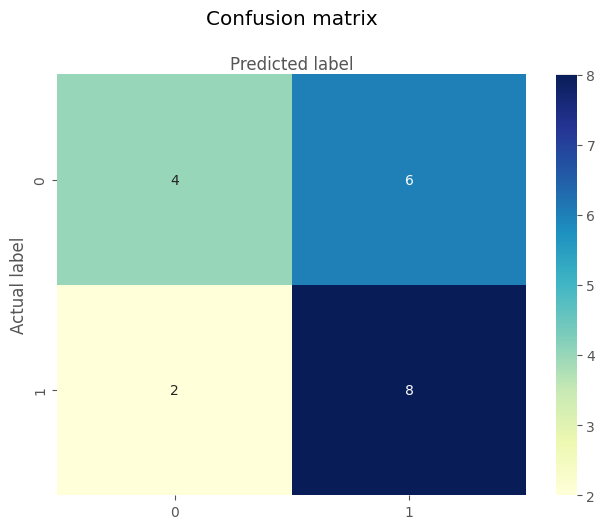

In [ ]:
# heatmap visualization of the confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
# evaluating the confusion matrix

from sklearn.metrics import classification_report
target_names = ['not top 20', 'top 20']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

  not top 20       0.67      0.40      0.50        10
      top 20       0.57      0.80      0.67        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20



Classification rate of 60% - not great, but not bad?

Precision - this model predicted athletes in the top 20, 57% of the time - again, not great

Recall - if there are athletes in the test set who are in the top 20, the model can identify them 80% of the time



### ROC Curve

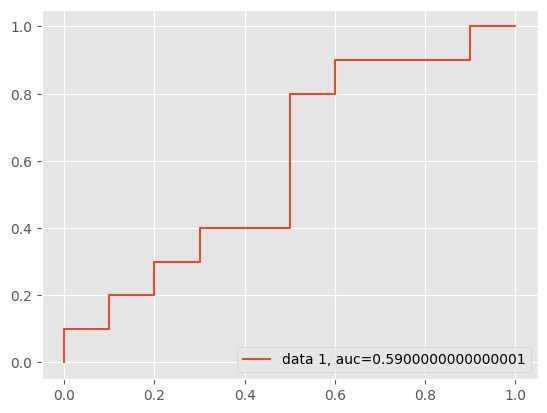

In [ ]:
# true positive rate against false positive rate

Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC = 0.59

Little above half - so probably not a great score